In [8]:
""""
Figaro times collection times script. 
"""
import numpy as np
import pandas as pd
import os
import regex as re
from openpyxl import load_workbook, Workbook
from openpyxl.utils.cell import get_column_letter

path_src = "/local/scratch/Figaro/tests_path/figaro-code"
exp_names = ["mkl", "figaro_lapack"]
exp_paths = {"figaro_lapack": "logs/figaro/svd/lapack/thread48", "mkl": "logs/decomp_alg/jacobi/col_major/u_and_s_and_v"}
figaro_impls = ["figaro_lapack"]
figaro_impls_full_name = {"figaro_lapack": "C++-figaro_lapack"}
db_names = ["DBRetailer", "DBFavorita", "DBYelp"]
join_orders = {"DBRetailer": "LocationRoot", "DBFavorita": "StoresRoot", "DBYelp": "BusinessRoot"}
start_per = 10
end_per = 100
per_inc = 10

txt_name = "log.txt"
numeric_const_pattern = r"##Orthogonality of U####([+-]?(\d+(\.\d*)?|\.\d+)([eE][+-]?\d+)?)"
rx = re.compile(numeric_const_pattern)

df_measurement_exps = {}
for exp_name in exp_names: 
    exp_path = exp_paths[exp_name]
    accur_path = os.path.join(path_src, exp_path)

    df_measurement = pd.DataFrame(columns=db_names)
    for db_name in db_names:
        join_order = join_orders[db_name]

        for db_idx, percent in enumerate(range(start_per, end_per + 1, per_inc)): 
            db_name_per = "{}{}".format(db_name, percent)
            path_txt = os.path.join(accur_path, db_name_per, join_order, "log.txt")
            #relative_error = 1
            with open(path_txt, 'r') as file_accur:
                for line in file_accur:
                    #print(line)
                    match = rx.search(line)
                    if match:
                        relative_error = float(match.group(1))

            df_measurement.at[percent, db_name] = relative_error
            
        #out_workbook.save(gather_times_path)
            
        
        #print(df_measurement)
        df_measurement_exps[exp_name] = df_measurement
        df_measurement.to_csv(exp_name + ".csv", sep="\t")
print(df_measurement_exps)





{'mkl':       DBRetailer   DBFavorita       DBYelp
10   2.27895e-13  7.00083e-13  5.31231e-14
20   2.76713e-13  1.73914e-12  1.90726e-14
30   3.77096e-13  1.52988e-12  7.16365e-14
40   4.14111e-13  2.71865e-12  3.64931e-14
50   3.66489e-13  2.46283e-12  4.32808e-14
60   4.67371e-13  9.58108e-12  4.30558e-14
70   5.14239e-13  2.88319e-12  1.41527e-13
80   5.70169e-13  1.63396e-12  1.03133e-13
90   8.84459e-13  3.05737e-12  1.11306e-13
100  5.69521e-13  3.51524e-12  1.20649e-13, 'figaro_lapack':       DBRetailer   DBFavorita       DBYelp
10   1.67019e-14  2.81133e-13  4.79893e-13
20   6.02816e-15  4.33646e-13  6.47685e-13
30    1.1458e-14  1.56635e-13  9.66207e-13
40   9.50193e-15   5.0322e-13  4.17102e-13
50   9.84642e-15  3.66893e-13   4.4486e-13
60   9.52037e-15  3.71514e-13  8.29788e-13
70   2.31791e-14  4.74957e-13  8.29386e-13
80   1.93223e-14  1.74291e-13  3.17475e-13
90   2.61865e-14  1.35528e-13  3.27022e-13
100  2.59124e-14  7.57236e-14  1.46368e-12}


mkl
10     2.27895e-13
20     2.76713e-13
30     3.77096e-13
40     4.14111e-13
50     3.66489e-13
60     4.67371e-13
70     5.14239e-13
80     5.70169e-13
90     8.84459e-13
100    5.69521e-13
Name: DBRetailer, dtype: object
mkl
10     7.00083e-13
20     1.73914e-12
30     1.52988e-12
40     2.71865e-12
50     2.46283e-12
60     9.58108e-12
70     2.88319e-12
80     1.63396e-12
90     3.05737e-12
100    3.51524e-12
Name: DBFavorita, dtype: object
mkl
10     5.31231e-14
20     1.90726e-14
30     7.16365e-14
40     3.64931e-14
50     4.32808e-14
60     4.30558e-14
70     1.41527e-13
80     1.03133e-13
90     1.11306e-13
100    1.20649e-13
Name: DBYelp, dtype: object
mkl
figaro_lapack
10     1.67019e-14
20     6.02816e-15
30      1.1458e-14
40     9.50193e-15
50     9.84642e-15
60     9.52037e-15
70     2.31791e-14
80     1.93223e-14
90     2.61865e-14
100    2.59124e-14
Name: DBRetailer, dtype: object
figaro_lapack
10     2.81133e-13
20     4.33646e-13
30     1.56635e-13
40      5.0322e

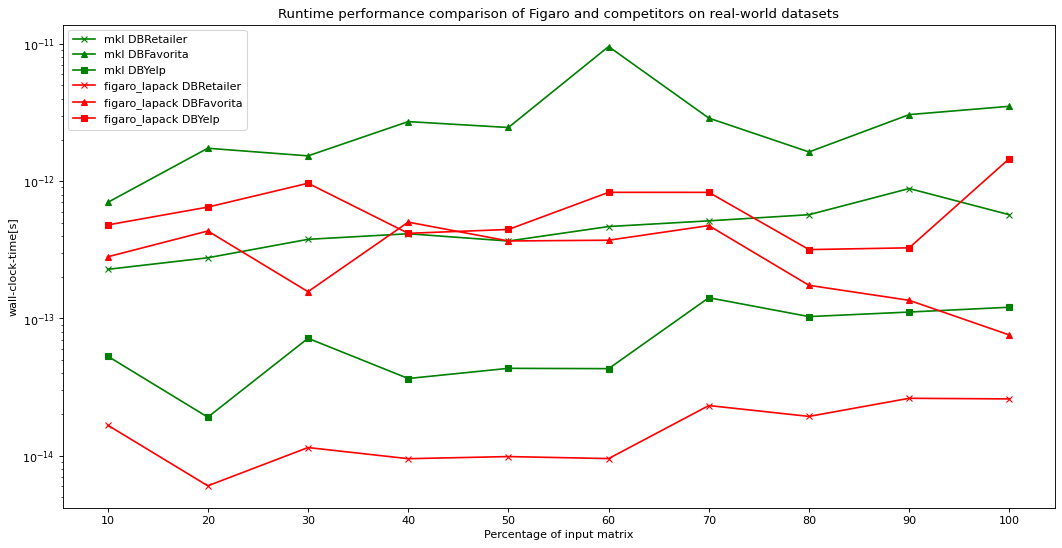

In [10]:
import matplotlib.pyplot as plt

plt.figure("name", figsize=(16, 8), dpi=80)
plt.xlabel("Percentage of input matrix")
plt.ylabel("wall-clock-time[s]")

plt.title("Runtime performance comparison of Figaro and competitors on real-world datasets")

plt.yscale('log', base=10)
plt.locator_params(axis='x', nbins=6)
plt.locator_params(axis='x', nbins=10)
db_markers =  {"DBFavorita": "^", "DBYelp": "s", "DBRetailer": "x"}
exp_colours = {"figaro_lapack": "r", "mkl": "g"}

for exp_name in exp_names:
    df_measurement = df_measurement_exps[exp_name]
    for db_name in df_measurement:
        exp_colour = exp_colours[exp_name]
        db_marker = db_markers[db_name]
        plt.plot(df_measurement[db_name], "-" + exp_colour + db_marker, label="{} {}".format(exp_name, db_name))
plt.legend(loc="upper left")

plt.show()